Try this Free online SD 1.5 generator with the results: https://perchance.org/fusion-ai-image-generator

 This Notebook is a Stable-diffusion tool which allows you to find similiar prompts to an existing prompt. It uses the Nearest Neighbor decoder method listed here:https://arxiv.org/pdf/2303.03032

In [2]:
# @title ✳️ Load/initialize values
#Imports
#!pip install safetensors
from safetensors.torch import load_file
import json , os , shelve , torch
import pandas as pd
#----#

def my_mkdirs(folder):
  if os.path.exists(folder)==False:
    os.makedirs(folder)

def fix_bad_symbols(txt):
  result = txt
  for symbol in ['^', '}', '{' , ')', '(', '[' , ']' , ':' , '=' ]:
    result = result.replace(symbol,'\\' + symbol)
  #------#
  return result;


def getPrompts(_path, separator):

  path = _path + '/text'
  path_enc = _path + '/text_encodings'
  #-----#
  index = 0
  file_index = 0
  prompts = {}
  text_encodings = {}
  _text_encodings = {}
  #-----#
  for filename in os.listdir(f'{path}'):

    print(f'reading {filename}....')
    _index = 0
    %cd {path}
    with open(f'{filename}', 'r') as f:
      data = json.load(f)
    #------#
    _df = pd.DataFrame({'count': data})['count']
    _prompts = {
        key : value for key, value in _df.items()
    }
    for key in _prompts:
      _index = int(key)
      value = _prompts[key]

      #Read the 'header' file in the JSON
      if _index <= 0 :
        _NUM_ITEMS = int(value)
        prompts[f'{index}'] = _prompts[f'{_index}'] + separator
        index = index + 1
        continue
      if _index <= 1 :
        _file_name = f'{value}'
        %cd {path_enc}
        _text_encodings = load_file(f'{_file_name}.safetensors')
        #Store text_encodings for the header items
        text_encodings[f'{index-1}'] = _text_encodings[f'{_index-1}']
        text_encodings[f'{index}'] = _text_encodings[f'{_index}']
        #------#
        prompts[f'{index}'] = _prompts[f'{_index}'] + separator
        index = index + 1
        continue
      #------#
      #Read the text_encodings + prompts
      text_encodings[f'{index}'] = _text_encodings[f'{_index}']
      prompts[f'{index}'] = _prompts[f'{_index}'] + separator
      index = index + 1
      continue
      #-------#
    #--------#
    #_text_encodings.close() #close the text_encodings file
    file_index = file_index + 1
  #----------#
  NUM_ITEMS = index -1
  return prompts , text_encodings , NUM_ITEMS
#--------#

def append_from_url(dictA, tensA , nA , url , separator):
  dictB , tensB, nB = getPrompts(url, separator)
  dictAB = dictA
  tensAB = tensA
  nAB = nA
  for key in dictB:
    nAB = nAB + 1
    dictAB[f'{nA + int(key)}'] = dictB[key]
    tensAB[f'{nA + int(key)}'] = tensB[key]
  #-----#
  return dictAB, tensAB , nAB-1
#-------#

home_directory = '/content/'
using_Kaggle = os.environ.get('KAGGLE_URL_BASE','')
if using_Kaggle : home_directory = '/kaggle/working/'
%cd {home_directory}

#🔸🔹
# Load the data if not already loaded
try:
    loaded
except:
    %cd {home_directory}
    !git clone https://huggingface.co/datasets/codeShare/text-to-image-prompts
    loaded = True
#--------#

#default NEG values
try: name_NEG
except: name_NEG = ''
try: image_NEG
except: image_NEG = ''
try: strength_image_NEG
except: strength_image_NEG = 1
try: strength_NEG
except: strength_NEG = 1
try: NUM_VOCAB_ITEMS
except: NUM_VOCAB_ITEMS = 0
try: using_NEG
except: using_NEG = False
try: using_image_NEG
except: using_image_NEG = False
#------#

def getJSON(path , filename):
  %cd {path}
  with open(f'{filename}', 'r') as f:
    data = json.load(f)
  #------#
  print(f'reading {filename}....')
  _df = pd.DataFrame({'count': data})['count']
  _prompts = {
      key : value for key, value in _df.items()
  }
  return _prompts

#----#

def getPromptsAndLinks(_path):
  path = _path + '/text'
  path_enc = _path + '/text_encodings'
  #-----#
  path_images = _path + '/images'
  path_enc_images = _path + '/image_encodings'
  #----#
  _file_name = ''
  _file_name_image = ''
  #-----#
  index = 0
  prompts = {}
  _prompts = {}
  #-------#
  urls = {}
  _urls = {}
  #------#
  text_encodings = {}
  _text_encodings = {}
  image_encodings = {}
  _image_encodings = {}
  #-----#
  for filename in os.listdir(f'{path}'):

    print(f'reading {filename}.json...')
    _index = 0
    %cd {path}
    with open(f'{filename}', 'r') as f:
      data = json.load(f)
      _df = pd.DataFrame({'count': data})['count']
      _prompts = {
          key : value for key, value in _df.items()
      }

    for key in _prompts:
      _index = int(key)
      value = _prompts[key]
      if _index<=0: continue
      if _index<=1:
        _file_name = f'{value}'
        _file_name_images = _prompts[f'{0}']
        #-------#
        print(f'reading {_file_name_images}.json..')
        %cd {path_images}
        with open(f'{_file_name_images}.json', 'r') as f:
          data = json.load(f)
          _df = pd.DataFrame({'count': data})['count']
          _urls = {
              key : value for key, value in _df.items()
          }
        #--------#
        %cd {path_enc}
        _text_encodings = load_file(f'{_file_name}.safetensors')
        text_encodings[f'{index-1}'] = _text_encodings[f'{_index-1}']
        text_encodings[f'{index}'] = _text_encodings[f'{_index}']
        #-------#
        %cd {path_enc_images}
        _image_encodings = load_file(f'{_file_name_images}.safetensors')
        image_encodings[f'{index-1}'] = _image_encodings[f'{_index-1}']
        image_encodings[f'{index}'] = _image_encodings[f'{_index}']
        #-------#
        prompts[f'{index-1}'] = _prompts[f'{_index-1}']
        urls[f'{index-1}'] = _urls[f'{_index-1}']
        prompts[f'{index}'] = _prompts[f'{_index}']
        urls[f'{index}'] = _urls[f'{_index}']
        #-------#
        index = index + 1
        continue
      #--------#
      #Read the text_encodings + prompts
      text_encodings[f'{index}'] = _text_encodings[f'{_index}']
      image_encodings[f'{index}'] = _image_encodings[f'{_index}']
      prompts[f'{index}'] = _prompts[f'{_index}']
      urls[f'{index}'] = _urls[f'{_index}']
      index = index + 1
      continue
      #-------#
    #--------#
  #----------#
  NUM_ITEMS = index -1
  return prompts , text_encodings , urls , image_encodings , NUM_ITEMS
#--------#



/content
/content
Cloning into 'text-to-image-prompts'...
remote: Enumerating objects: 3013, done.
remote: Counting objects: 100% (3013/3013), done.
remote: Compressing objects: 100% (2538/2538), done.
remote: Total 3013 (delta 649), reused 2366 (delta 418), pack-reused 0 (from 0)
Receiving objects: 100% (3013/3013), 19.23 MiB | 18.63 MiB/s, done.
Resolving deltas: 100% (649/649), done.
Filtering content: 100% (768/768), 2.21 GiB | 47.23 MiB/s, done.


In [ ]:
# @title 📚 Select items to sample from

prompt_features = True # @param {"type":"boolean","placeholder":"🦜"}
civitai_blue_set = True # @param {"type":"boolean","placeholder":"📘"}
suffix = True # @param {"type":"boolean","placeholder":"🔹"}
prefix = False # @param {"type":"boolean","placeholder":"🔸"}
emojis = True # @param {"type":"boolean","placeholder":"😃"}
#------#

first_names = False # @param {"type":"boolean","placeholder":"🔹"}
last_names = False # @param {"type":"boolean","placeholder":"🔸"}
celebs = True # @param {"type":"boolean","placeholder":"🆔👨"}
#-------#
danbooru_tags = True # @param {"type":"boolean","placeholder":"🎀"}
lyrics = True # @param {"type":"boolean","placeholder":"🎼"}
tripple_nouns =  True # @param {"type":"boolean","placeholder":"🎼"}
#-----#
female_fullnames = True # @param {"type":"boolean","placeholder":"😃"}
debug = False
#------#
prompts = {}
text_encodings = {}
nA = 0
#--------#


if tripple_nouns:
  url = '/content/text-to-image-prompts/nouns'
  prompts , text_encodings, nA = append_from_url(prompts , text_encodings, nA , url , '')

if lyrics:
  url = '/content/text-to-image-prompts/lyrics'
  prompts , text_encodings, nA = append_from_url(prompts , text_encodings, nA , url , '')

if danbooru_tags:
  url = '/content/text-to-image-prompts/danbooru'
  prompts , text_encodings, nA = append_from_url(prompts , text_encodings, nA , url , '')
#--------#

if first_names:
  url = '/content/text-to-image-prompts/names/firstnames'
  prompts , text_encodings, nA = append_from_url(prompts , text_encodings, nA , url , '')
#--------#

if last_names:
  url = '/content/text-to-image-prompts/names/lastnames'
  prompts , text_encodings, nA = append_from_url(prompts , text_encodings, nA , url , '')
#--------#

if celebs:
  url = '/content/text-to-image-prompts/names/celebs/mixed'
  prompts , text_encodings, nA = append_from_url(prompts , text_encodings, nA , url , '')
#--------#

if female_fullnames:
  url = '/content/text-to-image-prompts/names/fullnames'
  prompts , text_encodings, nA = append_from_url(prompts , text_encodings, nA , url , '')
#--------#


if prompt_features:
  url = '/content/text-to-image-prompts/civitai-prompts/green'
  prompts , text_encodings, nA = append_from_url(prompts , text_encodings, nA , url , '')
#--------#


if emojis:
  url = '/content/text-to-image-prompts/vocab/text_encodings/emoji'
  prompts , text_encodings, nA = append_from_url(prompts , text_encodings, nA , url , '')
#--------#


if civitai_blue_set:
  url = '/content/text-to-image-prompts/civitai-prompts/blue'
  prompts , text_encodings, nA = append_from_url(prompts , text_encodings, nA , url , '')
#--------#

if suffix :
  tmp = '/content/text-to-image-prompts/vocab/text_encodings/suffix/'
  for item in ['common','average','rare','weird','exotic'] :
    url =  tmp  + item
    prompts , text_encodings, nA = append_from_url(prompts , text_encodings, nA , url , '')
#------#

if prefix :
  tmp = '/content/text-to-image-prompts/vocab/text_encodings/prefix/'
  for item in ['common','average','rare','weird','exotic'] :
    url =  tmp  + item
    prompts , text_encodings, nA = append_from_url(prompts , text_encodings, nA , url , '-')
#------#

if debug:
  index = 0
  for key in prompts: index = index + 1
  print(index)
  index = 0
  for key in text_encodings : index = index + 1
  print(index)
#------#

NUM_VOCAB_ITEMS = nA
text_tensor = torch.zeros(NUM_VOCAB_ITEMS,768)
for index in range(NUM_VOCAB_ITEMS):
  text_tensor[index] = text_encodings[f'{index}']
#---------#



'brown_hair female_only  open_mouth  open_mouth  short_twintails  prostitution  siblings no random prompt found!'

{highres 2girls|duo 2girls|2girls smile|tongue twins 2girls|duo twins|short twins Japanese japanese smile 2girls smiling|2girls duo|2 girls duo|famous japanese twins cute|gyaru Twin tails|highres cute|gms2girls arima kana|belt beautiful japanese actress side by side|2girls adorable|twin tail|2girl twins|akanbe ;p|double paizuri|2girls v smile|twin tails smile| junk bernie suffer|ryosios |2 girls cute|2girl adorable|nakano_maru |open mouth ribbon|4k highres cute|d twin tails bangs|2girls twins| trend night thing|uneven 2girls teenager|long 2girls young|short hair2girls kafuka|double_bun |low twin-tails| twin ground case|kago_no_tori |high very cute faces|yokoyama_nao |twin_tails|twintails earrings|Aono Nana|Yamari Elings |short ribbon_twins</w>|michairu |uwu twins sisters|babymetal</w>|ragho_no_erika |smile maruyama_aya |twin ponytails|twintails smile|ohogao open mouth| de

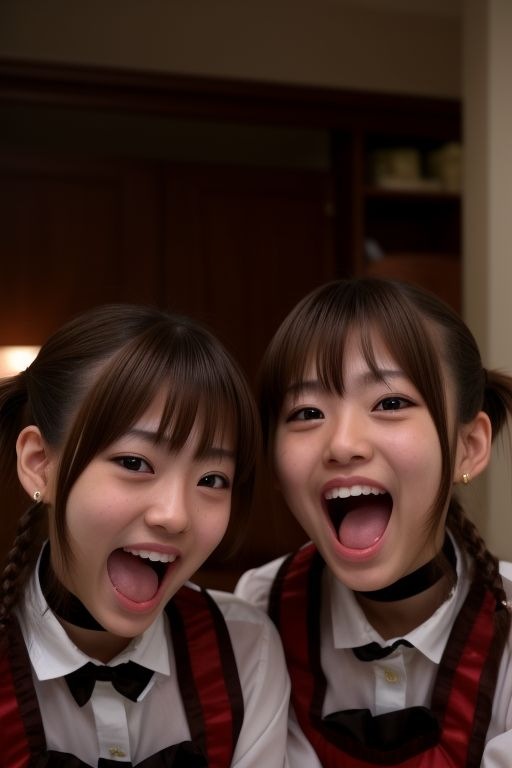

In [22]:
# @title 	⚄ Use a pre-encoded prompt + image pair from the fusion gen (note: NSFW!)

#image_index = 0 # @param {type:'number'}
# @markdown 📥 Load the data (only required one time)
load_the_data = False # @param {type:"boolean"}

# @markdown 🖼️ Choose a pre-encoded reference
index = 708 # @param {type:"slider", min:0, max:1666, step:1}

PROMPT_INDEX = index

# @markdown ⚖️ Set the value for C in the reference  <br> <br> sim = C* text_enc + image_enc*(1-C) <br><br>

C = 0.5 # @param {type:"slider", min:0, max:1, step:0.01}

# @markdown 🚫 Penalize similarity to this prompt(optional)

NEG = '' # @param {type:'string'}
strength = 1 # @param {type:"slider", min:-5, max:5, step:0.1}

# @markdown Calculate most similiar items using above settings?
enable = True # @param {type:"boolean"}

if (load_the_data):
  target_prompts , target_text_encodings , urls , target_image_encodings , NUM_ITEMS =  getPromptsAndLinks('/content/text-to-image-prompts/fusion')
  from transformers import AutoTokenizer
  tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-large-patch14", clean_up_tokenization_spaces = False)
  from transformers import  CLIPProcessor, CLIPModel
  processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14" , clean_up_tokenization_spaces = True)
  model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
  logit_scale = model.logit_scale.exp() #logit_scale = 100.00000762939453

from PIL import Image
import requests
prompt = target_prompts[f'{index}']
url = urls[f'{index}']
if url.find('perchance')>-1:
  image = Image.open(requests.get(url, stream=True).raw)
else: print("(No image for this ID)")

print("")
print(f"'{prompt}'")
print("")

if(enable):
  text_features_A = target_text_encodings[f'{index}']
  image_features_A =  target_image_encodings[f'{index}']

  # text-similarity
  sims =  C * torch.matmul(text_tensor, text_features_A.t())

  neg_sims = 0*sims
  if(NEG != ''):

    # Get text features for user input
    inputs = tokenizer(text = NEG, padding=True, return_tensors="pt")
    text_features_NEG = model.get_text_features(**inputs)
    text_features_NEG = text_features_A/text_features_A.norm(p=2, dim=-1, keepdim=True)

    # text-similarity
    neg_sims =  strength*torch.matmul(text_tensor, text_features_NEG.t())
  #------#

  # plus image-similarity
  sims = sims +  (1-C) * torch.matmul(text_tensor, image_features_A.t()) * logit_scale


  # minus NEG-similarity
  sims = sims - neg_sims

  # Sort the items
  sorted , indices = torch.sort(sims,dim=0 , descending=True)

  # @title ⚙️📝 Print the results (Advanced)
  list_size = 1000 # param {type:'number'}
  start_at_index = 0 # param {type:'number'}
  print_Similarity = True # param {type:"boolean"}
  print_Prompts = True # param {type:"boolean"}
  print_Prefix = True # param {type:"boolean"}
  print_Descriptions = True # param {type:"boolean"}
  compact_Output = True # param {type:"boolean"}

  # @markdown -----------
  # @markdown ⚙️📝 Printing options
  newline_Separator = False # @param {type:"boolean"}

  import random
  list_size2 = 1000 # param {type:'number'}
  start_at_index2 = 10000 # param {type:'number'}
  rate_percent  = 0 # param {type:"slider", min:0, max:100, step:1}

  # @markdown Repeat output N times
  N = 7 # @param {type:"slider", min:0, max:10, step:1}

  # title Show the 100 most similiar suffix and prefix text-encodings to the text encoding
  RANGE = list_size
  separator = '|'
  if newline_Separator : separator = separator + '\n'

  _prompts = ''
  _sims =  ''
  for _index in range(start_at_index + RANGE):
    if _index < start_at_index : continue
    index = indices[_index].item()

    prompt = prompts[f'{index}']
    if rate_percent >= random.randint(0,100) : prompt = prompts[f'{random.randint(start_at_index2 , start_at_index2 + list_size2)}']

    #Remove duplicates
    if _prompts.find(prompt + separator)<=-1:
      _sims = _sims + f'{round(100*sims[index].item(), 2)} %' + separator
    #-------#
    _prompts = _prompts.replace(prompt + separator,'')
    _prompts = _prompts  + prompt + separator
    #------#
  #------#
  _prompts = fix_bad_symbols(_prompts)
  __prompts = ('{' + _prompts + '}').replace(separator + '}', '}')
  __sims = ('{' + _sims + '}').replace(separator + '}', '}')
  #------#

  if(not print_Prompts): __prompts = ''
  if(not print_Similarity): __sims = ''

  if(not compact_Output):
    if(print_Descriptions):
      print(f'The {start_at_index}-{start_at_index + RANGE} most similiar items to prompt : \n\n ')
      for i in range(N) : print(__prompts)
      print(f'The {start_at_index}-{start_at_index + RANGE} similarity % for items : \n\n' + __sims)
      print('')
    else:
      for i in range(N) : print(__prompts)
  else:
    for i in range(N) : print(__prompts)
  #-------#
  #-------#
#-------#
image


The savefile can be used here : https://perchance.org/fusion-ai-image-generator

In [ ]:
# @title 	⚄ Create fusion-generator .json savefile from result
filename = 'blank.json'
path = '/content/text-to-image-prompts/fusion/'

print(f'reading {filename}....')
_index = 0
%cd {path}
with open(f'{filename}', 'r') as f:
  data = json.load(f)
#------#
_df = pd.DataFrame({'count': data})['count']
_savefile = {
    key : value for key, value in _df.items()
}
#------#
from safetensors.torch import load_file
import json , os , torch
import pandas as pd
#----#
def my_mkdirs(folder):
  if os.path.exists(folder)==False:
    os.makedirs(folder)
#------#
savefile_prompt = ''
for i in range(N) : savefile_prompt = savefile_prompt + ' ' + __prompts
_savefile['main'] = savefile_prompt.replace('\n', ' ').replace('  ', ' ').replace('   ', ' ')
#------#
save_filename = f'fusion_C05_X7_1000_{PROMPT_INDEX}.json'
output_folder = '/content/output/savefiles/'
my_mkdirs(output_folder)
#-----#
%cd {output_folder}
print(f'Saving segment {save_filename} to {output_folder}...')
with open(save_filename, 'w') as f:
    json.dump(_savefile, f)


In [ ]:
# @title 	⚄ Create a savefile-set from the entire range of pre-encoded items

#image_index = 0 # @param {type:'number'}
# @markdown 📥 Load the data (only required one time)
load_the_data = True # @param {type:"boolean"}

# @markdown ⚖️ Set the value for C in the reference  <br> <br> sim = C* text_enc + image_enc*(1-C) <br><br>

C = 0.5 # @param {type:"slider", min:0, max:1, step:0.01}

# @markdown 🚫 Penalize similarity to this prompt(optional)

if(load_the_data):
  from PIL import Image
  import requests
  target_prompts , target_text_encodings , urls , target_image_encodings , NUM_ITEMS =  getPromptsAndLinks('/content/text-to-image-prompts/fusion')
  from transformers import AutoTokenizer
  tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-large-patch14", clean_up_tokenization_spaces = False)
  from transformers import  CLIPProcessor, CLIPModel
  processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14" , clean_up_tokenization_spaces = True)
  model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
  logit_scale = model.logit_scale.exp() #logit_scale = 100.00000762939453
#---------#

filename = 'blank.json'
path = '/content/text-to-image-prompts/fusion/'
print(f'reading {filename}....')
_index = 0
%cd {path}
with open(f'{filename}', 'r') as f:
  data = json.load(f)
#------#
_df = pd.DataFrame({'count': data})['count']
_blank = {
    key : value for key, value in _df.items()
}
#------#

root_savefile_name = 'fusion_C05_X7_1000_'
output_folder = '/content/output/savefiles/'
my_mkdirs(output_folder)
NEG = '' # @param {type:'string'}
strength = 1 # @param {type:"slider", min:-5, max:5, step:0.1}

for index in range(1667):

  PROMPT_INDEX = index

  prompt = target_prompts[f'{index}']
  url = urls[f'{index}']
  if url.find('perchance')>-1:
    image = Image.open(requests.get(url, stream=True).raw)
  else: continue #print("(No image for this ID)")

  print(f"no. {PROMPT_INDEX} : '{prompt}'")


  if(True):
    text_features_A = target_text_encodings[f'{index}']
    image_features_A =  target_image_encodings[f'{index}']

    # text-similarity
    sims =  C * torch.matmul(text_tensor, text_features_A.t())

    neg_sims = 0*sims
    if(NEG != ''):

      # Get text features for user input
      inputs = tokenizer(text = NEG, padding=True, return_tensors="pt")
      text_features_NEG = model.get_text_features(**inputs)
      text_features_NEG = text_features_A/text_features_A.norm(p=2, dim=-1, keepdim=True)

      # text-similarity
      neg_sims =  strength*torch.matmul(text_tensor, text_features_NEG.t())
    #------#

    # plus image-similarity
    sims = sims +  (1-C) * torch.matmul(text_tensor, image_features_A.t()) * logit_scale

    # minus NEG-similarity
    sims = sims - neg_sims

    # Sort the items
    sorted , indices = torch.sort(sims,dim=0 , descending=True)

    # @title ⚙️📝 Print the results (Advanced)
    list_size = 1000 # param {type:'number'}
    start_at_index = 0 # param {type:'number'}
    print_Similarity = True # param {type:"boolean"}
    print_Prompts = True # param {type:"boolean"}
    print_Prefix = True # param {type:"boolean"}
    print_Descriptions = True # param {type:"boolean"}
    compact_Output = True # param {type:"boolean"}

    # @markdown -----------
    # @markdown ⚙️📝 Printing options
    newline_Separator = False # @param {type:"boolean"}

    import random
    list_size2 = 1000 # param {type:'number'}
    start_at_index2 = 10000 # param {type:'number'}
    rate_percent  = 0 # param {type:"slider", min:0, max:100, step:1}

    # @markdown Repeat output N times
    N = 7 # @param {type:"slider", min:0, max:10, step:1}

    # title Show the 100 most similiar suffix and prefix text-encodings to the text encoding
    RANGE = list_size
    separator = '|'
    if newline_Separator : separator = separator + '\n'

    _prompts = ''
    _sims =  ''
    for _index in range(start_at_index + RANGE):
      if _index < start_at_index : continue
      index = indices[_index].item()

      prompt = prompts[f'{index}']
      if rate_percent >= random.randint(0,100) : prompt = prompts[f'{random.randint(start_at_index2 , start_at_index2 + list_size2)}']

      #Remove duplicates
      if _prompts.find(prompt + separator)<=-1:
        _sims = _sims + f'{round(100*sims[index].item(), 2)} %' + separator
      #-------#
      _prompts = _prompts.replace(prompt + separator,'')
      _prompts = _prompts  + prompt + separator
      #------#
    #------#
    _prompts = fix_bad_symbols(_prompts)
    __prompts = ('{' + _prompts + '}').replace(separator + '}', '}')
    __sims = ('{' + _sims + '}').replace(separator + '}', '}')
    #------#
  #--------#
  _savefile = _blank
  from safetensors.torch import load_file
  import json , os , torch
  import pandas as pd
  #----#
  def my_mkdirs(folder):
    if os.path.exists(folder)==False:
      os.makedirs(folder)
  #------#
  savefile_prompt = ''
  for i in range(N) : savefile_prompt = savefile_prompt + ' ' + __prompts
  _savefile['main'] = savefile_prompt.replace('\n', ' ').replace('  ', ' ').replace('   ', ' ')
  #------#
  save_filename = f'{root_savefile_name}{PROMPT_INDEX}.json'
  #-----#
  %cd {output_folder}
  print(f'Saving savefile {save_filename} to {output_folder}...')
  with open(save_filename, 'w') as f:
      json.dump(_savefile, f)
  #---------#
  continue
#-----------#



In [ ]:
# Determine if this notebook is running on Colab or Kaggle
#Use https://www.kaggle.com/ if Google Colab GPU is busy
home_directory = '/content/'
using_Kaggle = os.environ.get('KAGGLE_URL_BASE','')
if using_Kaggle : home_directory = '/kaggle/working/'
%cd {home_directory}
#-------#

# @title Download the text_encodings as .zip
import os
%cd {home_directory}
#os.remove(f'{home_directory}results.zip')
root_output_folder = home_directory + 'output/'
zip_dest = f'{home_directory}results.zip'
!zip -r {zip_dest} {root_output_folder}

In [ ]:
# @title ⚙️📝 Print the results (Advanced)
list_size = 1000 # @param {type:'number'}
start_at_index = 0 # @param {type:'number'}
print_Similarity = True # @param {type:"boolean"}
print_Prompts = True # @param {type:"boolean"}
print_Descriptions = True # @param {type:"boolean"}
compact_Output = True # @param {type:"boolean"}
newline_Separator = False # @param {type:"boolean"}

import random
# @markdown -----------
# @markdown Mix with...
list_size2 = 1000 # @param {type:'number'}
start_at_index2 = 10000 # @param {type:'number'}
rate_percent  = 0 # @param {type:"slider", min:0, max:100, step:1}

# @markdown -----------
# @markdown Repeat output N times
N = 6 # @param {type:"slider", min:0, max:10, step:1}

# title Show the 100 most similiar suffix and prefix text-encodings to the text encoding
RANGE = list_size
separator = '|'
if newline_Separator : separator = separator + '\n'

_prompts = ''
_sims =  ''
for _index in range(start_at_index + RANGE):
  if _index < start_at_index : continue
  index = indices[_index].item()

  prompt = prompts[f'{index}']
  if rate_percent >= random.randint(0,100) : prompt = prompts[f'{random.randint(start_at_index2 , start_at_index2 + list_size2)}']

  #Remove duplicates
  if _prompts.find(prompt + separator)<=-1:
    _sims = _sims + f'{round(100*sims[index].item(), 2)} %' + separator
  #-------#
  _prompts = _prompts.replace(prompt + separator,'')
  _prompts = _prompts  + prompt + separator
  #------#
#------#
__prompts = fix_bad_symbols(__prompts)
__prompts = ('{' + _prompts + '}').replace(separator + '}', '}')
__sims = ('{' + _sims + '}').replace(separator + '}', '}')
#------#

if(not print_Prompts): __prompts = ''
if(not print_Similarity): __sims = ''

if(not compact_Output):
  if(print_Descriptions):
    print(f'The {start_at_index}-{start_at_index + RANGE} most similiar items to prompt : \n\n ')
    for i in range(N) : print(__prompts)
    print(f'The {start_at_index}-{start_at_index + RANGE} similarity % for items : \n\n' + __sims)
    print('')
  else:
    for i in range(N) : print(__prompts)
else:
  for i in range(N) : print(__prompts)
#-------#